# Pandas
- 행과 열의 구조를 가지는 데이터를 다룰 때 사용하는 라이브러리
- Pandas 구조
   - Series : 1차원 데이터 구조, 인덱스와 값으로 구성
   - DataFrame : 2 차원 데이터 구조, 행과 열로 구성
   -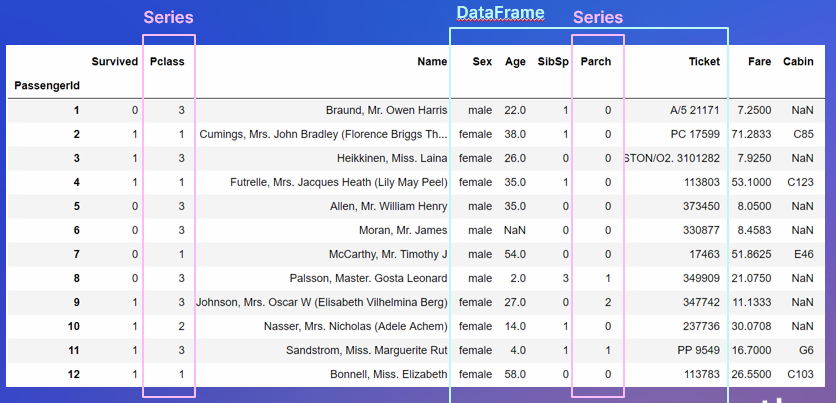

In [408]:
import pandas as pd
#판다스 불러와서 pd라고 부르겠다. 

#### Series 생성

In [409]:
#리스트를 활용 생상
pd.Series( ['의철','나정','은서','소용'] )

0    의철
1    나정
2    은서
3    소용
dtype: object

In [410]:
pd.Series( ['의철','나정','은서','소용'] , index =[500, 123, 467, 428])

500    의철
123    나정
467    은서
428    소용
dtype: object

#### Series 연산 

In [411]:
#딕셔너리 활용 생성 { key : value }
#{key:value} -> key는 index, value는 value
data = {'칙촉' : 2000, '나쵸칩' : 1700, '빼빼로' : 1150, '다이제':1500 }

snack = pd.Series (data)
snack


칙촉     2000
나쵸칩    1700
빼빼로    1150
다이제    1500
dtype: int64

In [412]:
data2= {'칙촉' : 2300, '나쵸칩' : 2100, '제크' : 1800, '초코칩쿠키':1900 }
snak2 = pd.Series(data2)
snak2

칙촉       2300
나쵸칩      2100
제크       1800
초코칩쿠키    1900
dtype: int64

In [413]:
#과자 가격 비교 (시리즈 연산)
result = snak2 - snack
result
#NaN : 결측치(비어있는 값, null, na)
#동일한 인덱스가 없음 -> 마이너스 연산X -> 결측치 발생 

나쵸칩      400.0
다이제        NaN
빼빼로        NaN
제크         NaN
초코칩쿠키      NaN
칙촉       300.0
dtype: float64

In [414]:
#결측치 확인 -> isnull()
result[result.isnull()] # -> 불리언 인덱싱
#불리언(T/F) 자료형으로 결과 출력

다이제     NaN
빼빼로     NaN
제크      NaN
초코칩쿠키   NaN
dtype: float64

In [415]:
#결측치가 아닌 데이터 확인 ->  notnull()
result.notnull()
result[result.notnull()]

나쵸칩    400.0
칙촉     300.0
dtype: float64

In [416]:
#결측값에 데이터 넣기
result['다이제'] = 250
result

나쵸칩      400.0
다이제      250.0
빼빼로        NaN
제크         NaN
초코칩쿠키      NaN
칙촉       300.0
dtype: float64

In [417]:
#인덱스가 없는 값 추가 
result['새우깡'] = 100
result

나쵸칩      400.0
다이제      250.0
빼빼로        NaN
제크         NaN
초코칩쿠키      NaN
칙촉       300.0
새우깡      100.0
dtype: float64

In [418]:
#결측치를 특정값으로 채우기 
result = result.fillna(0)

In [419]:
result

나쵸칩      400.0
다이제      250.0
빼빼로        0.0
제크         0.0
초코칩쿠키      0.0
칙촉       300.0
새우깡      100.0
dtype: float64

In [420]:
#데이터 삭제 
del result['빼빼로']
result

나쵸칩      400.0
다이제      250.0
제크         0.0
초코칩쿠키      0.0
칙촉       300.0
새우깡      100.0
dtype: float64

### DataFrame 생성하기 
- 행과 열의 구조를 가지는 2차원


In [421]:
mbti = pd.DataFrame([['김나정', 'INTJ'],
              ['이휘수', 'ESFJ'],
              ['정유진','ESFJ'],
              ['강은서','ENTP'],
              ['정세연', 'INTJ']],
                   index = ['01','02','03','04','05'],
                   columns = ['이름', 'MBTI'])
mbti

,이름,MBTI
01,김나정,INTJ
02,이휘수,ESFJ
03,정유진,ESFJ
04,강은서,ENTP
05,정세연,INTJ


In [422]:
#전치 : 행과 열의 구조를 바꾸는 것임 
mbti = mbti.T

In [423]:
mbti

,01,02,03,04,05
이름,김나정,이휘수,정유진,강은서,정세연
MBTI,INTJ,ESFJ,ESFJ,ENTP,INTJ


In [424]:
#딕셔너리 활용 df 생성 
data = {'이름' : ['김나정','이휘수','정유진','강은서','정세연'],
       'MBTI' : ['INTJ','ESFJ','ESFJ','ENTP','INTJ']}
data2 = pd.DataFrame(data, index = ['01','02','03','04','05'])
data2

,이름,MBTI
01,김나정,INTJ
02,이휘수,ESFJ
03,정유진,ESFJ
04,강은서,ENTP
05,정세연,INTJ


- 데이터프레임 확인하기

In [425]:
#인덱스 확인
data2.index

Index(['01', '02', '03', '04', '05'], dtype='object')

In [426]:
#컬럼명 확인
data2.columns

Index(['이름', 'MBTI'], dtype='object')

In [427]:
#데이터 확인
data2.values

array([['김나정', 'INTJ'],
       ['이휘수', 'ESFJ'],
       ['정유진', 'ESFJ'],
       ['강은서', 'ENTP'],
       ['정세연', 'INTJ']], dtype=object)

In [428]:
#DF 크기 확인 
data2.shape

(5, 2)

### 데이터 로밍 : pd.read_csv()

In [429]:
#한글 포함 파일의 
hr_info= pd.read_csv('data/hr-info.csv', encoding='EUC-KR')

In [430]:
#인코딩 방식 확인 
import chardet
with open('data/hr-info.csv', 'rb') as f: #파일 열기 
    data = f.read() #파일을 읽어서 변수 저장 
chardet.detect(data)

{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}

In [431]:
#column을 index로 지정하여 읽어오기
hr_info= pd.read_csv('data/hr-info.csv', encoding='EUC-KR', index_col='EID')
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [432]:
#.info(): 간략한 정보 확인
hr_info.info()
#데이타 및, 컬럼 수, 컬럼명, 결측치 유무 확인 가능

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, E00206 to E00428
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENAME               200 non-null    object 
 1   GENDER              200 non-null    object 
 2   ORG_CD              197 non-null    object 
 3   POS_CD              200 non-null    object 
 4   AGE                 200 non-null    int64  
 5   SERVICE_YEAR        200 non-null    int64  
 6   EDU_LEVEL           200 non-null    object 
 7   PERFORMANCE_SCORE   200 non-null    float64
 8   SALARY              200 non-null    int64  
 9   LAST_PROMO_DT       182 non-null    object 
 10  TRAINING_HOURS      200 non-null    int64  
 11  SKILLS              200 non-null    object 
 12  ACTIVE_STATE        200 non-null    object 
 13  HIRE_DATE           200 non-null    object 
 14  RETIRE_DATE         49 non-null     object 
 15  RETIRE_REASON       49 non-null     object 
 16  REHIR

In [433]:
hr_info.shape

(200, 19)

In [434]:
#상위 데이터 출력 
hr_info.head() #기본값 5개

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y


In [435]:
#하위 데이터 출력
hr_info.tail(1)

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00428,을충나,F,ORG003,P009,24,0,학사 학위,0.0,4500,NaN,4,"Data Analysis, Python, Marketing",Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 데이터 색인

- 열(컬럼) 색인

In [436]:
#하나의 컬럼
hr_info[ "ENAME" ]
# Series 형태로 출력 

EID
E00206     시이오
E00181     나사장
E00164    난부사장
E00190     판라다
E00209     누훈봉
          ... 
E00322     부탐회
E00389     초두반
E00438     권개득
E00304     탐출조
E00428     을충나
Name: ENAME, Length: 200, dtype: object

In [437]:
#여러개의 컬럼 가지고오기 
hr_info[ ['ENAME','GENDER'] ]#인덱싱을 위한 대괄호 #2리스트를 위한 대괄호
#DataFrame 형태로 출력 

,ENAME,GENDER
EID,,
E00206,시이오,M
E00181,나사장,F
E00164,난부사장,M
E00190,판라다,F
E00209,누훈봉,M
...,...,...
E00322,부탐회,F
E00389,초두반,F
E00438,권개득,M


- 행 색인 (슬라이싱 )

In [438]:
hr_info[1:3] # 숫자 (index)활용

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


In [439]:
#문자(지정된 인덱스 값) 활용
hr_info['E00181':'E00164']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y


- 데이터 연산

In [440]:
#연봉컬럼 
hr_info['SALARY'] / 12 #요소별 연산 가능 

EID
E00206    850.000000
E00181    791.666667
E00164    758.333333
E00190    708.333333
E00209    716.666667
             ...    
E00322    375.000000
E00389    375.000000
E00438    375.000000
E00304    375.000000
E00428    375.000000
Name: SALARY, Length: 200, dtype: float64

In [441]:
hr_info['SALARY'] >= 5000

EID
E00206     True
E00181     True
E00164     True
E00190     True
E00209     True
          ...  
E00322    False
E00389    False
E00438    False
E00304    False
E00428    False
Name: SALARY, Length: 200, dtype: bool

- 문자열 변경


In [442]:
hr_info['EDU_LEVEL'].str.replace("학위","")

EID
E00206    박사 
E00181    박사 
E00164    박사 
E00190    박사 
E00209    박사 
         ... 
E00322    학사 
E00389    학사 
E00438    학사 
E00304    학사 
E00428    학사 
Name: EDU_LEVEL, Length: 200, dtype: object

In [443]:
#직접 대입해야 연산결과 반영
hr_info['EDU_LEVEL' ] = hr_info['EDU_LEVEL'].str.replace("학위","")

hr_info
 

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 실습 예제
- 육군신체측정정보데이터를 활용하여 BMI 지수 계산하기 

In [444]:
#'육군신체측정정보.csv' 파일 읽어오기
data = pd.read_csv('data/육군신체측정정보.csv',low_memory = False, index_col='순번')

In [445]:
data

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
순번,,,,,,,,,
1,20140106,96.3,92.6,185.5 cm,82.5,83.8,57.1,28.5,73.2 kg
2,2013,101.9,83.8,167.2 cm,81.2,74.4,55.0,24.2,65.1 kg
3,20140106,99.5,89.6,179.9 cm,99.2,84.2,56.3,28.1,93.2 kg
4,2013,98.6,85.5,171.4 cm,85.9,76.4,54.5,27.4,71.6 kg
5,20140106,94.7,88.1,176.9 cm,78.3,79.7,58.5,26.5,67.1 kg
...,...,...,...,...,...,...,...,...,...
167979,20170131,100.6 cm,86.4 cm,173.2 cm,86.7 cm (34.1 in),77.1 cm,56.9 cm,27.1 cm,73.7 kg
167980,20170131,97.9 cm,82.7 cm,166.3 cm,90.5 cm (35.6 in),73.4 cm,61.5 cm,28.8 cm,70.7 kg
167981,20170131,97.9 cm,87.2 cm,175.2 cm,94.3 cm (37.1 in),83.1 cm,57.1 cm,27.6 cm,78.7 kg


In [446]:
data.size

1511847

In [447]:
data.shape

(167983, 9)

In [448]:
#대략적인 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167983 entries, 1 to 167983
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   측정 일자       167983 non-null  int64 
 1   가슴 둘레 센티미터  167982 non-null  object
 2   소매길이 센티미터   167983 non-null  object
 3   신장 센티미터     167983 non-null  object
 4   허리 둘레 센티미터  167983 non-null  object
 5   샅높이 센티미터    167983 non-null  object
 6   머리 둘레 센티미터  167981 non-null  object
 7   발 길이 센티미터   167983 non-null  object
 8   몸무게 킬로그램    167983 non-null  object
dtypes: int64(1), object(8)
memory usage: 12.8+ MB


In [449]:
#bmi계산을 위해' 신장 센티미터', '몸무게 킬로그램'
data['신장 센티미터']

순번
1         185.5 cm
2         167.2 cm
3         179.9 cm
4         171.4 cm
5         176.9 cm
            ...   
167979    173.2 cm
167980    166.3 cm
167981    175.2 cm
167982    173.6 cm
167983    175.8 cm
Name: 신장 센티미터, Length: 167983, dtype: object

In [450]:
#문자에서 숫자로 바구어주어야 함. 
# ' cm'로 숫자 정보가 문자 타입으로 들어가있음 
#1. ' cm' 먼저 제거하기
height = data['신장 센티미터'].str.replace(" cm","")
height

순번
1         185.5
2         167.2
3         179.9
4         171.4
5         176.9
          ...  
167979    173.2
167980    166.3
167981    175.2
167982    173.6
167983    175.8
Name: 신장 센티미터, Length: 167983, dtype: object

In [451]:
#2. float 형태로 변경 (float32)
height = height.astype('float64')

In [452]:
height

순번
1         185.5
2         167.2
3         179.9
4         171.4
5         176.9
          ...  
167979    173.2
167980    166.3
167981    175.2
167982    173.6
167983    175.8
Name: 신장 센티미터, Length: 167983, dtype: float64

In [453]:
#'몸무게 킬로그램' 가져와서 숫자 정보로 바꾸기 
weight = data['몸무게 킬로그램']
weight

순번
1         73.2 kg
2         65.1 kg
3         93.2 kg
4         71.6 kg
5         67.1 kg
           ...   
167979    73.7 kg
167980    70.7 kg
167981    78.7 kg
167982    57.4 kg
167983    51.7 kg
Name: 몸무게 킬로그램, Length: 167983, dtype: object

In [454]:
wegith = data['몸무게 킬로그램'].str.replace('kg','').astype('float64')
wegith

순번
1         73.2
2         65.1
3         93.2
4         71.6
5         67.1
          ... 
167979    73.7
167980    70.7
167981    78.7
167982    57.4
167983    51.7
Name: 몸무게 킬로그램, Length: 167983, dtype: float64

In [455]:
#키 데이터를 m단위로 변경하기 
(height / 100)**2
#bmi 계산 BMI 지수 = 몸무게 (kg) / 키(m) x 키 (m)


순번
1         3.441025
2         2.795584
3         3.236401
4         2.937796
5         3.129361
            ...   
167979    2.999824
167980    2.765569
167981    3.069504
167982    3.013696
167983    3.090564
Name: 신장 센티미터, Length: 167983, dtype: float64

In [456]:
#bmi = weight / (height / 100)**2


### Boolean 색인
- 조건에 해당하는 데이터 추출
- 연산 결과가 True 인 자리 값 추출

In [457]:
#연봉이 5000 이상인 사람 추출
hr_info['SALARY'] >= 5000 #조건, 결과값이 T/F
hr_info[hr_info['SALARY'] >= 5000] 

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00460,춘란시,M,ORG023,P008,29,0,학사,0.00,5000,2024-03-01,4,"Data Analysis, Python",N,2024-03-01,2024-05-01,이직,N,KOREA,N
E00468,다덕출,F,ORG028,P008,29,0,학사,0.00,5000,2024-03-01,4,"Java, Project Management, Salesforce",Y,2024-03-01,NaN,NaN,NaN,KOREA,N
E00469,리모루,M,ORG014,P008,29,0,학사,0.00,5000,2024-03-01,4,Project Management,Y,2024-03-01,NaN,NaN,NaN,India,N


In [458]:
#성별이 여자인 사람들만 추출
#1. GENDER 컬럼
hr_info['GENDER'] 
hr_info[hr_info['GENDER'] == 'F']

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00181,나사장,F,NaN,P002,49,24,박사,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00298,포난서,F,ORG021,P004,47,19,석사,3.63,8500,2023-03-01,47,Data Analysis,Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
E00487,고명초,F,ORG014,P004,47,20,석사,1.81,8600,2022-03-01,49,"Marketing, Salesforce, Project Management",Y,2004-03-01,NaN,NaN,NaN,Japan,Y
E00294,중우방,F,ORG021,P004,48,19,박사,2.56,8600,2023-03-01,12,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00382,망팽단,F,ORG026,P009,22,0,학사,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00189,초옥덕,F,ORG020,P009,23,0,학사,0.00,4500,NaN,4,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00322,부탐회,F,ORG014,P009,23,0,학사,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [459]:
#여성인 사람의 이름 리스트 추출 
hr_info[hr_info['GENDER'] == 'F']['ENAME']

EID
E00181    나사장
E00190    판라다
E00298    포난서
E00487    고명초
E00294    중우방
         ... 
E00382    망팽단
E00189    초옥덕
E00322    부탐회
E00389    초두반
E00428    을충나
Name: ENAME, Length: 83, dtype: object

In [460]:
hr_info['ENAME'][hr_info['GENDER'] == 'F']
#앞은 컬럼인덱싱이고 뒤에 컬럼은 불리언 인덱싱임 

EID
E00181    나사장
E00190    판라다
E00298    포난서
E00487    고명초
E00294    중우방
         ... 
E00382    망팽단
E00189    초옥덕
E00322    부탐회
E00389    초두반
E00428    을충나
Name: ENAME, Length: 83, dtype: object

### 7월 17일

### 데이터 색인
- 행과 열의 범위를 통해 데이터 추출

#### 인덱서 (loc, iloc)
- 인덱서[ 행 범위, 열 범위 ]
- loc : 인덱스명, 컬럼명을 통해 추출 (ex.문자)
- iloc : 인덱스 번호를 통해 추출, 끝 범위 포함x (ex. 숫자)

In [461]:
hr_info= pd.read_csv('data/hr-info.csv', encoding='EUC-KR', index_col='EID')
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [462]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


In [463]:
hr_info.iloc[ 0:3, 0:3 ]

,ENAME,GENDER,ORG_CD
EID,,,
E00206,시이오,M,NaN
E00181,나사장,F,NaN
E00164,난부사장,M,NaN


In [464]:
hr_info.loc[ 'E00206':'E00164', 'ENAME' :'ORG_CD']

,ENAME,GENDER,ORG_CD
EID,,,
E00206,시이오,M,NaN
E00181,나사장,F,NaN
E00164,난부사장,M,NaN


In [465]:
hr_info.loc[:'E00181'] #행 범위만 지정하면 전체 열이 불러와짐

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y


In [466]:
hr_info.loc[  : ,'GENDER' ] #전체 행의 하나의 컬럼을 요청한 것이기 때문에 시리즈가 반환됨. 

EID
E00206    M
E00181    F
E00164    M
E00190    F
E00209    M
         ..
E00322    F
E00389    F
E00438    M
E00304    M
E00428    F
Name: GENDER, Length: 200, dtype: object

In [467]:
#권개득 정보만 필요할 때 
hr_info.loc['E00438', :]

ENAME                        권개득
GENDER                         M
ORG_CD                    ORG024
POS_CD                      P009
AGE                           23
SERVICE_YEAR                   0
EDU_LEVEL                  학사 학위
PERFORMANCE_SCORE            0.0
SALARY                      4500
LAST_PROMO_DT                NaN
TRAINING_HOURS                 4
SKILLS                    Python
ACTIVE_STATE                   Y
HIRE_DATE             2024-09-01
RETIRE_DATE                  NaN
RETIRE_REASON                NaN
REHIRE_YN                    NaN
NATION                     KOREA
ROUNDING_DEDUCTION             N
Name: E00438, dtype: object

In [468]:
hr_info.loc[ 'E00181','ENAME' ]

'나사장'

In [469]:
#30살 미만의 직원들의 연봉('SALARY')와 근속년수 ('SERVICE_YEAR')
#조건 1, 30살 미만의 직원
hr_info['AGE'] <30
#불리언 값 나옴 T/F
#2. 30살 미만의 직원들 정보 추출
hr_info[hr_info['AGE'] <30][['SALARY','SERVICE_YEAR']]
#추출하는 컬럼이 두개일 때 리스트를 만들어줌

,SALARY,SERVICE_YEAR
EID,,
E00272,7400,14
E00201,5600,1
E00229,5600,1
E00320,5600,1
E00347,5600,1
...,...,...
E00322,4500,0
E00389,4500,0
E00438,4500,0


In [470]:
#'박사 학위'인 사람들의 '나이'와 'PERFORMANCE_SCORE' 출력
hr_info[hr_info['EDU_LEVEL'] == '박사 학위'][['ENAME','AGE','PERFORMANCE_SCORE']]

,ENAME,AGE,PERFORMANCE_SCORE
EID,,,
E00206,시이오,49,4.50
E00181,나사장,49,4.60
E00164,난부사장,48,4.60
E00190,판라다,47,3.51
E00209,누훈봉,47,3.38
E00294,중우방,48,2.56
E00411,구류길,48,4.87
E00210,봉묵정,41,2.65
E00258,처록신,40,1.97


In [471]:
#불리언 인덱싱, 인덱서 활용
hr_info.loc[hr_info['EDU_LEVEL'] == '박사 학위',['AGE','PERFORMANCE_SCORE']]

,AGE,PERFORMANCE_SCORE
EID,,
E00206,49,4.50
E00181,49,4.60
E00164,48,4.60
E00190,47,3.51
E00209,47,3.38
E00294,48,2.56
E00411,48,4.87
E00210,41,2.65
E00258,40,1.97


In [472]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N


### 데이터 추가 (행, 열)
- column(열) 추가
- DF['추가할 컬럼명'] = 데이터
- 가장 마지막 컬럼으로 추가 

In [473]:
hr_info['SALARY'] = hr_info['SALARY'].astype(int)

In [474]:
(hr_info['SALARY'] / 12).round(1)

EID
E00206    850.0
E00181    791.7
E00164    758.3
E00190    708.3
E00209    716.7
          ...  
E00322    375.0
E00389    375.0
E00438    375.0
E00304    375.0
E00428    375.0
Name: SALARY, Length: 200, dtype: float64

In [475]:
hr_info['MONTHLY_PAY'] = (hr_info['SALARY'] / 12).round(1)

In [476]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.50,10200,2024-03-01,240,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.60,9500,2024-03-01,236,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.60,9100,2024-03-01,240,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.00,4500,NaN,4,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.00,4500,NaN,4,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.00,4500,NaN,4,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


- 행(ROW)추가
- DF.loc['추가할 인덱스명']=데이터
- colums 수를 맞춰서 데이터를 입력해줘야 함 

In [509]:
hr_info.columns

Index(['ENAME', 'GENDER', 'ORG_CD', 'POS_CD', 'AGE', 'SERVICE_YEAR',
       'EDU_LEVEL', 'PERFORMANCE_SCORE', 'SALARY', 'LAST_PROMO_DT',
       'TRAINING_HOURS', 'SKILLS', 'ACTIVE_STATE', 'HIRE_DATE', 'RETIRE_DATE',
       'RETIRE_REASON', 'REHIRE_YN', 'NATION', 'ROUNDING_DEDUCTION',
       'MONTHLY_PAY'],
      dtype='object')

In [ ]:
#결측치 생성
import numpy as np
np.nan

In [491]:
hr_info.loc ['E77777'] = ['마두팔', 'F', 'ORG008', 'P008', '20', '0',
       '석사', '0', '5000', '100000',
       np.nan, np.nan, np.nan, np.nan, np.nan,
       np.nan, np.nan, np.nan,np.nan,
       np.nan]
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00304,탐출조,M,ORG009,P009,24,0,학사 학위,0.0,4500,NaN,4.0,Salesforce,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


- column (열) 삽입 (추가)
- DF.insert( loc = index, columns = 컬럼명, value = 데이터 )

In [477]:
# hr_info.insert(loc = 7, column = 'DAILY_PAY',value = hr_info['MONTHLY_PAY']/ 21)

In [510]:
#모든 컬럼을 출력해 보는 방법
pd.set_option('display.max_columns', None)

In [511]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


#### 연습문제
- input 함수 이용해서 스킬을 입력받고 해당 스킬을 보유한 직원 검색
- skill : Java, Python, Marketing 검색
- Series.str.contains( 검색하고자하는 데이터 )

In [479]:
string = input('문자열 입력')
string

문자열 입력 Java


'Java'

In [480]:
hr_info['SKILLS'].str.contains(string)

EID
E00206    False
E00181    False
E00164     True
E00190     True
E00209     True
          ...  
E00322     True
E00389     True
E00438    False
E00304    False
E00428    False
Name: SKILLS, Length: 200, dtype: bool

In [484]:
#'박사 학위'인 사람들의 '나이'와 'PERFORMANCE_SCORE' 출력
#hr_info[hr_info['EDU_LEVEL'] == '박사 학위'][['ENAME','AGE','PERFORMANCE_SCORE']]
hr_info[hr_info['SKILLS'].str.contains(string)]['ENAME']

EID
E00164    난부사장
E00190     판라다
E00209     누훈봉
E00242     규모사
E00294     중우방
          ... 
E00315     탐말당
E00364     사디길
E00248     말만양
E00322     부탐회
E00389     초두반
Name: ENAME, Length: 63, dtype: object

In [487]:
hr_info['SKILLS'].str.contains(string)

EID
E00206    False
E00181    False
E00164     True
E00190     True
E00209     True
          ...  
E00322     True
E00389     True
E00438    False
E00304    False
E00428    False
Name: SKILLS, Length: 200, dtype: bool

In [507]:
hr_info[hr_info['SKILLS'].str.contains(string)]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,2024-03-01,0.0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,691.7
E00169,제언로,M,ORG004,P004,48,20,학사 학위,3.9,8500,2022-03-01,32.0,"Salesforce, Data Analysis, Python",Y,2004-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12.0,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
E00326,부현망,F,ORG024,P004,48,20,고등학교 졸업,4.93,8500,2022-03-01,81.0,Python,Y,2004-03-01,NaN,NaN,NaN,USA,Y,708.3
E00346,루신디,F,ORG011,P004,48,19,석사 학위,1.25,8500,2023-03-01,83.0,Python,Y,2005-03-01,NaN,NaN,NaN,USA,Y,708.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00303,팽봉신,M,ORG030,P009,22,0,학사 학위,0.0,4500,NaN,4.0,"Java, Python",Y,2024-03-01,NaN,NaN,NaN,KOREA,N,375.0
E00382,망팽단,F,ORG026,P009,22,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00250,비식백,M,ORG019,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Project Management, Python",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


In [493]:
hr_info.loc['E77777','SKILLS'] = 'Salesforce, Data Analysis, Java'

In [496]:
hr_info[hr_info['SKILLS'].str.contains(string)]

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
E00242,규모사,M,ORG027,P004,47,18,학사 학위,2.22,8300,2024-03-01,0.0,"Java, Salesforce, Python",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,691.7
E00294,중우방,F,ORG021,P004,48,19,박사 학위,2.56,8600,2023-03-01,12.0,"Python, Salesforce, Java",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00364,사디길,M,ORG027,P009,22,0,고등학교 졸업,0.0,4500,NaN,4.0,Java,Y,2024-03-01,NaN,NaN,NaN,KOREA,N,375.0
E00248,말만양,M,ORG017,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Project Management, Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


In [497]:
string = input('문자열 입력')
hr_info['SKILLS'].str.contains(string)

문자열 입력 Python


EID
E00206    False
E00181    False
E00164    False
E00190    False
E00209    False
          ...  
E00389    False
E00438     True
E00304    False
E00428     True
E77777    False
Name: SKILLS, Length: 201, dtype: bool

In [503]:
#결측치 데이터 삭제 -> drop()
#삭제한 결과 반영 (1. 변수에 담기 / 2.inplace=True매개변수 이용)
# 행 삭제 : drop(인덱스 명)
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0


In [505]:
#열(컬럼) 삭제 : drop('컬럼명', axis=1)
hr_info.drop('REHIRE_YN', axis=1) 

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Java,Y,2024-09-01,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,KOREA,N,375.0


In [506]:
hr_info

,ENAME,GENDER,ORG_CD,POS_CD,AGE,SERVICE_YEAR,EDU_LEVEL,PERFORMANCE_SCORE,SALARY,LAST_PROMO_DT,TRAINING_HOURS,SKILLS,ACTIVE_STATE,HIRE_DATE,RETIRE_DATE,RETIRE_REASON,REHIRE_YN,NATION,ROUNDING_DEDUCTION,MONTHLY_PAY
EID,,,,,,,,,,,,,,,,,,,,
E00206,시이오,M,NaN,P001,49,25,박사 학위,4.5,10200,2024-03-01,240.0,"Marketing, Salesforce",Y,1999-03-01,NaN,NaN,NaN,KOREA,Y,850.0
E00181,나사장,F,NaN,P002,49,24,박사 학위,4.6,9500,2024-03-01,236.0,"Project Management, Marketing",Y,2000-03-01,NaN,NaN,NaN,KOREA,Y,791.7
E00164,난부사장,M,NaN,P003,48,22,박사 학위,4.6,9100,2024-03-01,240.0,"Salesforce, Data Analysis, Java",Y,2002-03-01,NaN,NaN,NaN,KOREA,Y,758.3
E00190,판라다,F,ORG007,P004,47,18,박사 학위,3.51,8500,2024-03-01,96.0,"Java, Data Analysis, Salesforce",Y,2006-03-01,NaN,NaN,NaN,KOREA,Y,708.3
E00209,누훈봉,M,ORG023,P004,47,19,박사 학위,3.38,8600,2023-03-01,66.0,"Java, Salesforce",Y,2005-03-01,NaN,NaN,NaN,KOREA,Y,716.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E00322,부탐회,F,ORG014,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Java,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00389,초두반,F,ORG012,P009,23,0,학사 학위,0.0,4500,NaN,4.0,"Salesforce, Java",Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
E00438,권개득,M,ORG024,P009,23,0,학사 학위,0.0,4500,NaN,4.0,Python,Y,2024-09-01,NaN,NaN,NaN,KOREA,N,375.0
